<a href="https://colab.research.google.com/github/sc7-cloud/TFG_GOOGLE_COLAB_REPOSITORY/blob/main/PRUEBA_DE_M%C3%81S_MODELOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


df_artistas = pd.read_excel('/content/Artistas.xlsx')
df_canciones = pd.read_excel('/content/Canciones.xlsx')


print(df_artistas.head())
print(df_canciones.head())

   Chartmetric ID         Artista  Artista ID            País          Región  \
0         1404155      Lola Young        1001     Reino Unido  Western Europe   
1          470449   Playboi Carti        1002  Estados Unidos   North America   
2            2007            Akon        1003         Senegal  Western Africa   
3            3544  Ellie Goulding        1004     Reino Unido  Western Europe   
4         1202489          GIVĒON        1005  Estados Unidos   North America   

      Continente      Solista/Grupo     Género 1    Género 2   Género 3  ...  \
0         Europe              Grupo          R&B    Folk Pop      Indie  ...   
1  North America  Artistas solistas  Hip-Hop/Rap     Pop Rap   Rage Rap  ...   
2         Africa  Artistas solistas  Hip-Hop/Rap         Pop   R&B/Soul  ...   
3         Europe  Artistas solistas   Electronic  Electropop  Indie Pop  ...   
4  North America  Artistas solistas          R&B         Pop   Neo-Soul  ...   

  Me gusta en TikTok Tasa de Par

In [ ]:



df_canciones.isnull().sum()



,0
Nombre Canción,0
Artistas,0
Chartmetric ID,0
Artista ID,0
Spotify ID,0
Posición Diaria,0
Movimiento Diario,0
Movimiento Semanal,0
País,0
fecha dato registrado,0


In [ ]:

df_artistas.isnull().sum()

,0
Chartmetric ID,0
Artista,0
Artista ID,0
País,0
Región,0
Continente,0
Solista/Grupo,0
Género 1,0
Género 2,0
Género 3,0


In [ ]:

df_canciones.dtypes


,0
Nombre Canción,object
Artistas,object
Chartmetric ID,int64
Artista ID,int64
Spotify ID,object
Posición Diaria,int64
Movimiento Diario,int64
Movimiento Semanal,int64
País,object
fecha dato registrado,datetime64[ns]


In [ ]:
df_artistas.dtypes

,0
Chartmetric ID,int64
Artista,object
Artista ID,int64
País,object
Región,object
Continente,object
Solista/Grupo,object
Género 1,object
Género 2,object
Género 3,object


In [ ]:

df_artistas['Artista ID'] = df_artistas['Artista ID'].astype('object')
df_artistas['Chartmetric ID'] = df_artistas['Chartmetric ID'].astype('object')

df_artistas[['Artista ID']].dtypes, df_canciones[['Chartmetric ID']].dtypes


(Artista ID    object
 dtype: object,
 Chartmetric ID    object
 dtype: object)

In [ ]:
df_canciones['Chartmetric ID'] = df_canciones['Chartmetric ID'].astype('object')
df_canciones['Artista ID'] = df_canciones['Artista ID'].astype('object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()


variables_sesgadas = ['Tasa de Participación en TikTok', 'Tasa de conversión en Spotify']


df_artistas[variables_sesgadas] = scaler.fit_transform(df_artistas[variables_sesgadas])


variables_restantes = ['Seguidores en TikTok', 'Me gusta en TikTok', 'Publicaciones de TikTok',
                       'Vistas en TikTok', 'Seguidores en Spotify', 'Oyentes mensuales en Spotify',
                       'Alcance de playlists en Spotify', 'Conteo de las playlists en Spotify']


df_artistas[variables_restantes] = scaler.fit_transform(df_artistas[variables_restantes])


df_artistas[variables_sesgadas + variables_restantes].describe()


,Tasa de Participación en TikTok,Tasa de conversión en Spotify,Seguidores en TikTok,Me gusta en TikTok,Publicaciones de TikTok,Vistas en TikTok,Seguidores en Spotify,Oyentes mensuales en Spotify,Alcance de playlists en Spotify,Conteo de las playlists en Spotify
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,0.056693,0.190721,0.125195,0.511821,0.058243,0.083218,0.253921,0.181533,0.146434,0.175886
std,0.100775,0.137669,0.131884,0.249780,0.088210,0.118408,0.223742,0.175472,0.171887,0.188905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007884,0.096320,0.029851,0.317308,0.012536,0.017272,0.075019,0.053736,0.028025,0.045038
50%,0.022525,0.160005,0.089552,0.482906,0.031763,0.042368,0.176964,0.126518,0.077032,0.100449
75%,0.059644,0.246032,0.164179,0.712607,0.066614,0.103815,0.373338,0.233881,0.204564,0.241499
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:

variables_canciones = ['Bailabilidad', 'Energía', 'Acústica', 'Instrumentalidad',
                       'Viveza', 'Valencia', 'Tempo', 'Compás', 'Volumen']


df_canciones[variables_canciones] = df_canciones[variables_canciones].abs()


df_canciones[variables_canciones] = scaler.fit_transform(df_canciones[variables_canciones])


df_canciones[variables_canciones].describe()


,Bailabilidad,Energía,Acústica,Instrumentalidad,Viveza,Valencia,Tempo,Compás,Volumen
count,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000
mean,0.676352,0.680125,0.248199,0.010922,0.164326,0.575305,0.517849,0.724946,0.172776
std,0.146597,0.159392,0.226624,0.074185,0.151179,0.230560,0.206241,0.096212,0.092597
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.585395,0.585921,0.060294,0.000000,0.076743,0.400105,0.447376,0.750000,0.128604
50%,0.698669,0.700496,0.174868,0.000000,0.105017,0.596205,0.543375,0.750000,0.172823
75%,0.781150,0.790951,0.392960,0.000025,0.199617,0.750132,0.640785,0.750000,0.220587
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:

df_canciones.describe()


,Artista ID,Posición Diaria,Movimiento Diario,Movimiento Semanal,fecha dato registrado,Popularidad,Duración sg,Fecha Lanzamiento Album,Bailabilidad,Energía,Tono,Volumen,Modo,Nivel Hablado,Acústica,Instrumentalidad,Viveza,Valencia,Tempo,Compás
count,214974.000000,214974.000000,214974.000000,214974.000000,214974,214974.000000,214974.000000,214974,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000,214974.000000
mean,2628.545638,25.496404,1.098407,2.889001,2024-07-31 10:04:12.599849472,78.236354,189.456599,2022-10-12 06:53:25.425772288,0.676352,0.680125,5.535604,0.172776,0.559123,0.094100,0.248199,0.010922,0.164326,0.575305,0.517849,0.724946
min,1001.000000,1.000000,-43.000000,-46.000000,2024-03-06 00:00:00,0.000000,37.000000,1945-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.024200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2101.000000,13.000000,-1.000000,-3.000000,2024-05-20 00:00:00,71.000000,160.000000,2023-11-03 00:00:00,0.585395,0.585921,2.000000,0.128604,0.000000,0.040000,0.060294,0.000000,0.076743,0.400105,0.447376,0.750000
50%,2495.000000,25.000000,0.000000,0.000000,2024-07-31 00:00:00,79.000000,180.000000,2024-04-03 00:00:00,0.698669,0.700496,6.000000,0.172823,1.000000,0.056900,0.174868,0.000000,0.105017,0.596205,0.543375,0.750000
75%,3446.000000,38.000000,2.000000,5.000000,2024-10-10 00:00:00,87.000000,212.000000,2024-06-21 00:00:00,0.781150,0.790951,9.000000,0.220587,1.000000,0.106000,0.392960,0.000025,0.199617,0.750132,0.640785,0.750000
max,4242.000000,50.000000,49.000000,49.000000,2025-01-01 00:00:00,100.000000,810.000000,2024-12-27 00:00:00,1.000000,1.000000,11.000000,1.000000,1.000000,0.921000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,867.282058,14.430689,7.445979,12.414976,NaN,12.733359,47.561570,NaN,0.146597,0.159392,3.611048,0.092597,0.496493,0.089821,0.226624,0.074185,0.151179,0.230560,0.206241,0.096212


In [ ]:
df_artistas.describe()

,Chartmetric ID,Seguidores en TikTok,Me gusta en TikTok,Tasa de Participación en TikTok,Publicaciones de TikTok,Vistas en TikTok,Seguidores en Spotify,Oyentes mensuales en Spotify,Tasa de conversión en Spotify,Alcance de playlists en Spotify,Conteo de las playlists en Spotify
count,4.020000e+02,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,6.836693e+05,0.125195,0.511821,0.056693,0.058243,0.083218,0.253921,0.181533,0.190721,0.146434,0.175886
std,1.540993e+06,0.131884,0.249780,0.100775,0.088210,0.118408,0.223742,0.175472,0.137669,0.171887,0.188905
min,1.200000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.837000e+03,0.029851,0.317308,0.007884,0.012536,0.017272,0.075019,0.053736,0.096320,0.028025,0.045038
50%,1.747675e+05,0.089552,0.482906,0.022525,0.031763,0.042368,0.176964,0.126518,0.160005,0.077032,0.100449
75%,5.961980e+05,0.164179,0.712607,0.059644,0.066614,0.103815,0.373338,0.233881,0.246032,0.204564,0.241499
max,1.069121e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


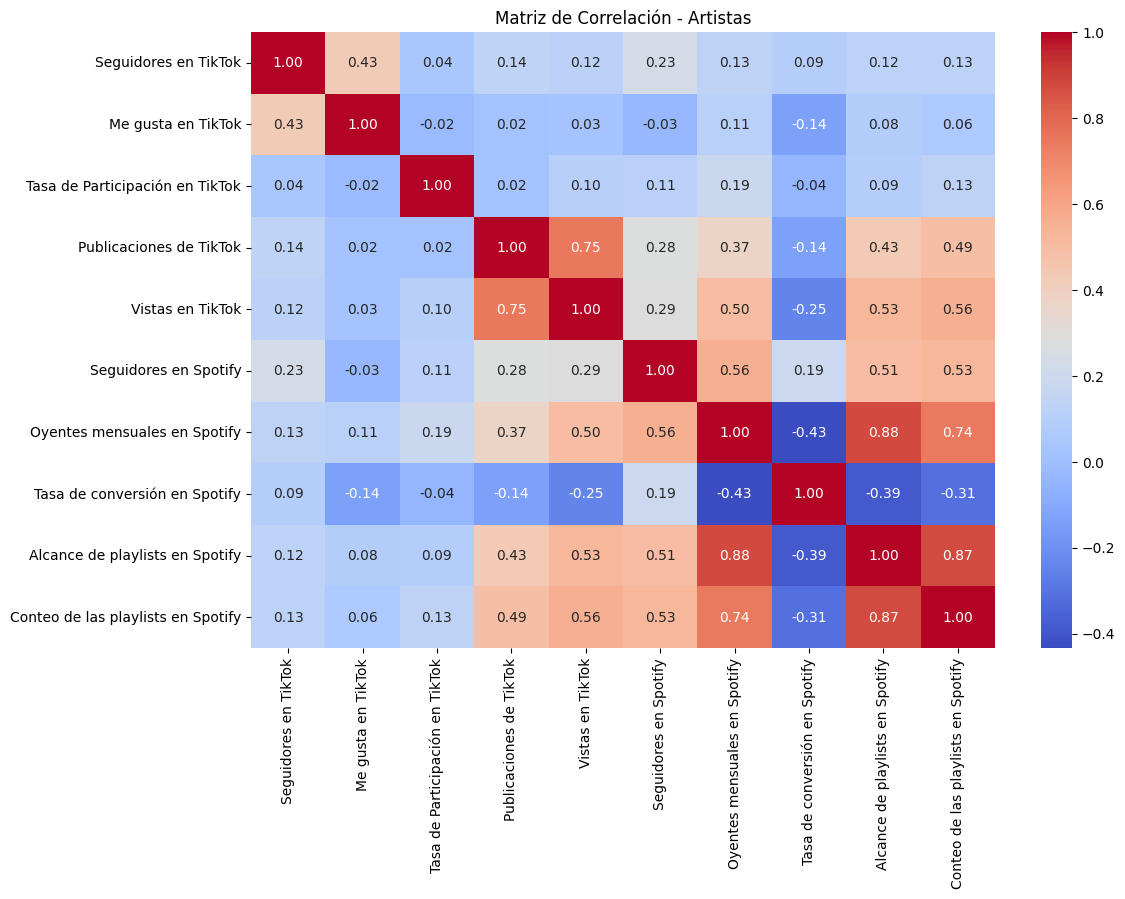

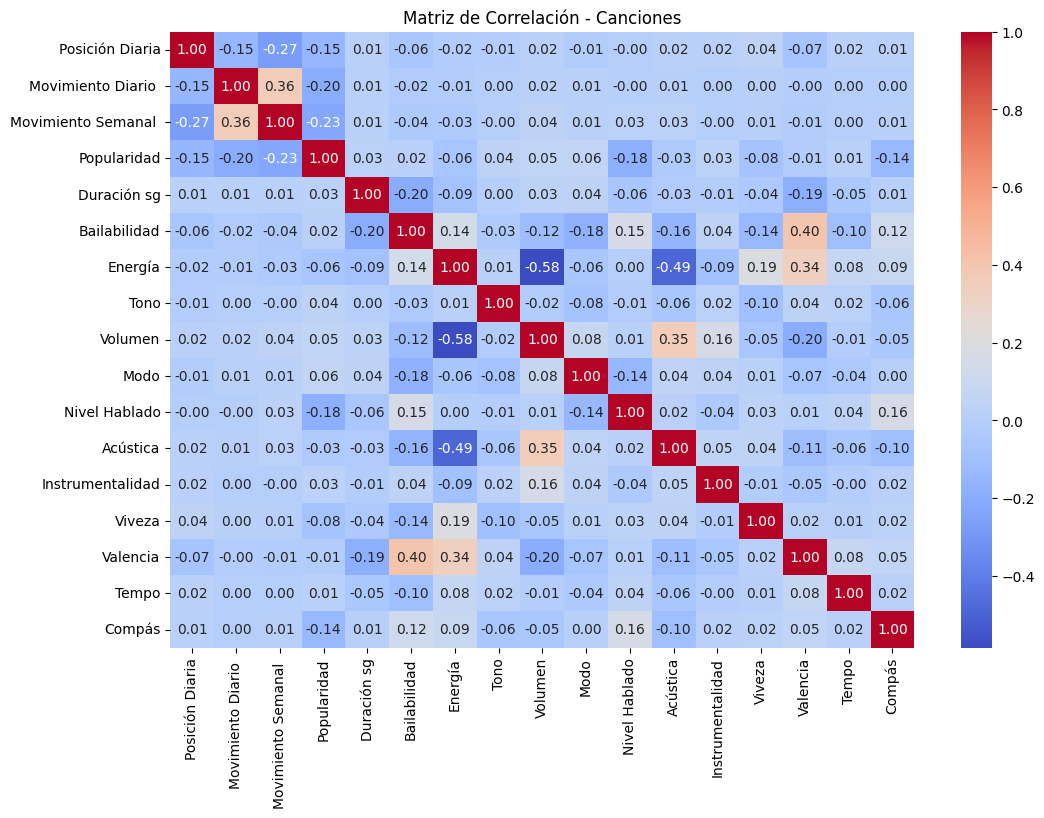

In [ ]:

numerical_columns_artistas = df_artistas.select_dtypes(include=['float64', 'int64']).columns
numerical_columns_canciones = df_canciones.select_dtypes(include=['float64', 'int64']).columns


correlation_matrix_artistas = df_artistas[numerical_columns_artistas].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_artistas, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación - Artistas')
plt.show()


correlation_matrix_canciones = df_canciones[numerical_columns_canciones].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_canciones, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación - Canciones')
plt.show()




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:

X = df_artistas[['Vistas en TikTok', 'Seguidores en TikTok', 'Tasa de Participación en TikTok',
                 'Publicaciones de TikTok', 'Conteo de las playlists en Spotify',
                 'Alcance de playlists en Spotify']]


y = df_artistas['Oyentes mensuales en Spotify']


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

model = LinearRegression()


model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))


r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))


print(f"Entrenamiento - R²: {r2_train:.4f}, MAE: {mae_train:.4f}, RMSE: {rmse_train:.4f}")
print(f"Prueba - R²: {r2_test:.4f}, MAE: {mae_test:.4f}, RMSE: {rmse_test:.4f}")


Entrenamiento - R²: 0.7903, MAE: 0.0524, RMSE: 0.0746
Prueba - R²: 0.7898, MAE: 0.0665, RMSE: 0.0979


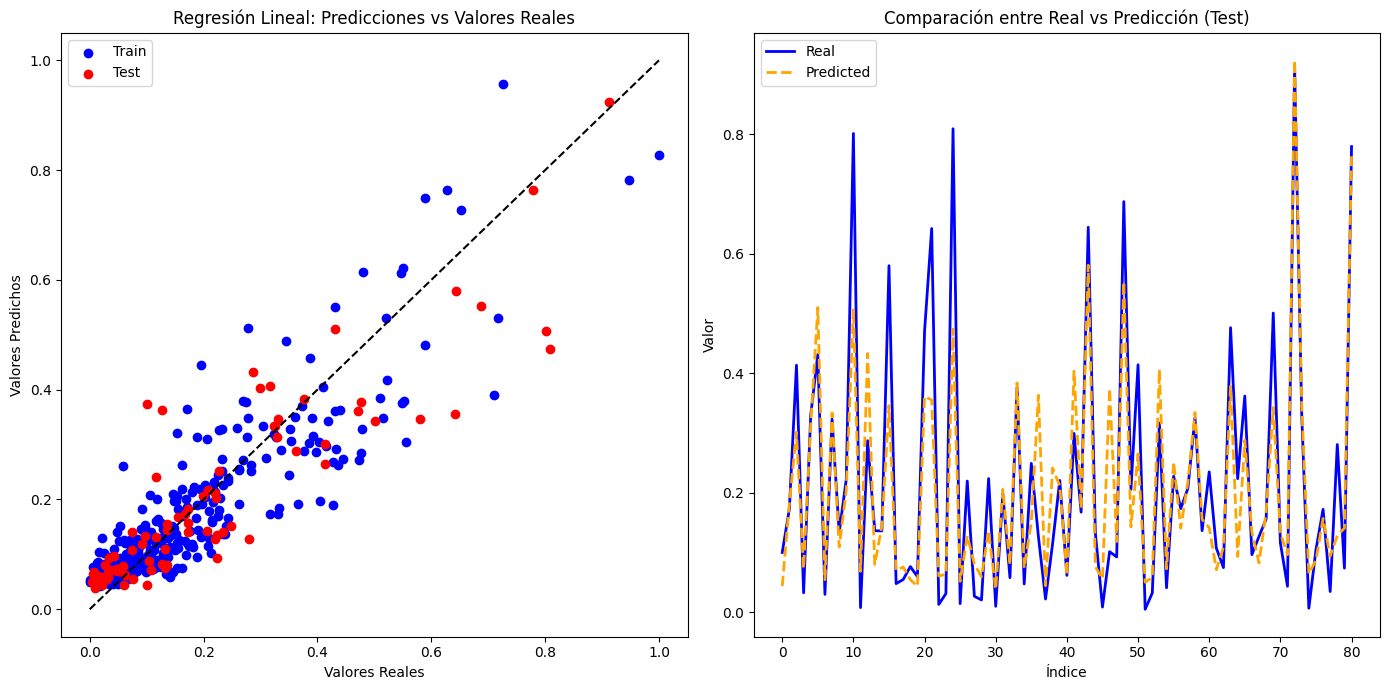

In [ ]:

plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión Lineal: Predicciones vs Valores Reales')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(y_test.values, label='Real', color='blue', linestyle='-', linewidth=2)
plt.plot(y_test_pred, label='Predicted', color='orange', linestyle='--', linewidth=2)
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación entre Real vs Predicción (Test)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:

variables_artistas_faltantes = ['Vistas en TikTok', 'Seguidores en TikTok', 'Tasa de Participación en TikTok',
                                'Publicaciones de TikTok', 'Conteo de las playlists en Spotify',
                                'Alcance de playlists en Spotify']


In [ ]:

coeficientes = model.coef_


import pandas as pd


importancia = pd.DataFrame({
    'Característica': variables_artistas_faltantes,
    'Coeficiente': coeficientes
})


importancia['Abs Coeficiente'] = importancia['Coeficiente'].abs()
importancia = importancia.sort_values(by='Abs Coeficiente', ascending=False)


print(importancia[['Característica', 'Coeficiente', 'Abs Coeficiente']])


                       Característica  Coeficiente  Abs Coeficiente
5     Alcance de playlists en Spotify     0.998479         0.998479
4  Conteo de las playlists en Spotify    -0.161847         0.161847
2     Tasa de Participación en TikTok     0.153734         0.153734
0                    Vistas en TikTok     0.120450         0.120450
3             Publicaciones de TikTok    -0.104873         0.104873
1                Seguidores en TikTok     0.023178         0.023178


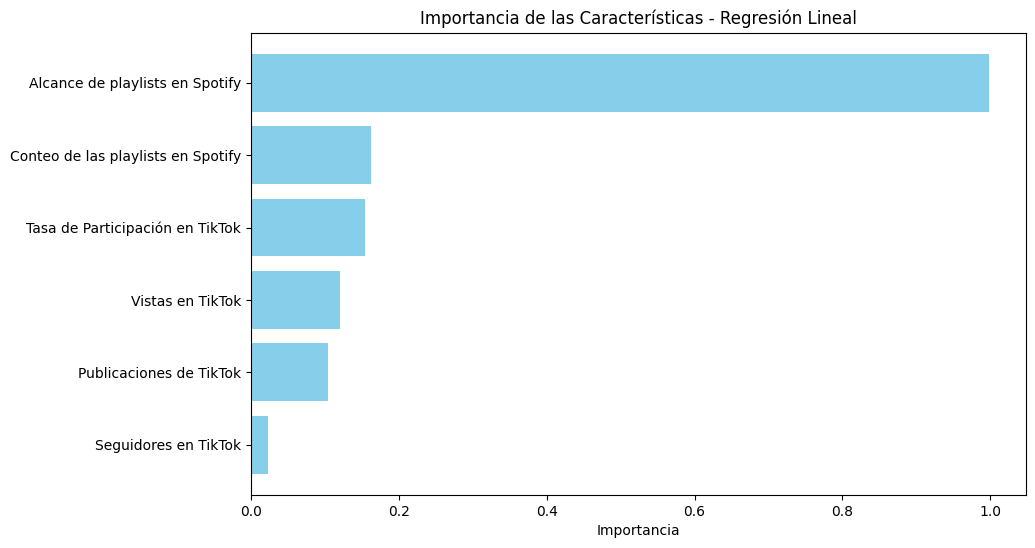

In [ ]:

plt.figure(figsize=(10, 6))
plt.barh(importancia['Característica'], importancia['Abs Coeficiente'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las Características - Regresión Lineal')
plt.gca().invert_yaxis()
plt.show()


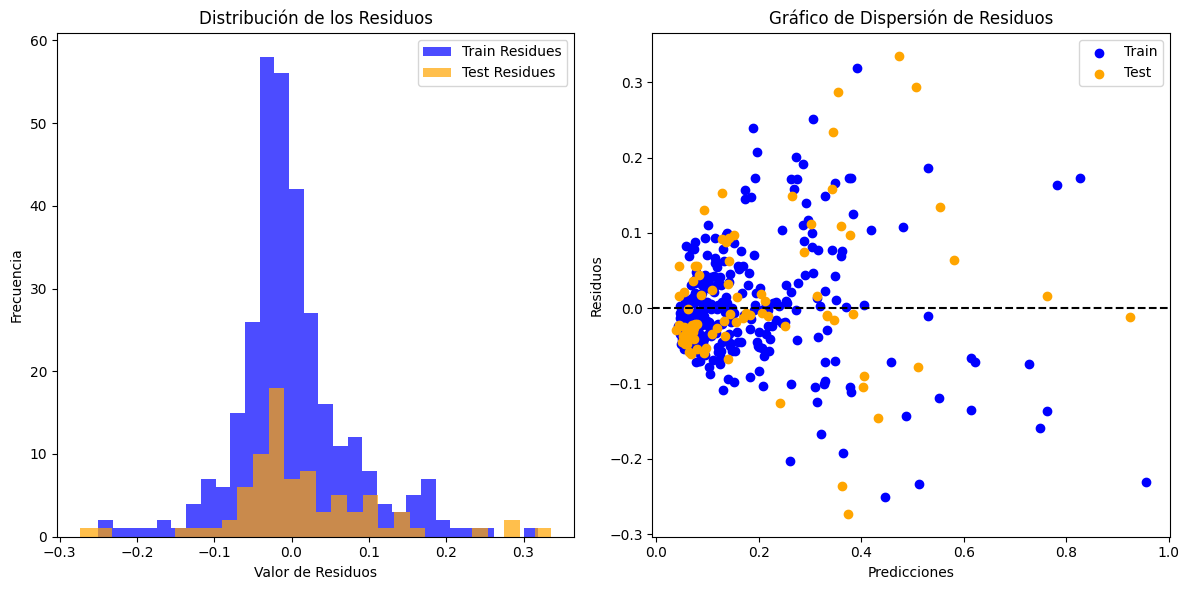

In [ ]:

residuos_train = y_train - y_train_pred
residuos_test = y_test - y_test_pred


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(residuos_train, bins=30, color='blue', alpha=0.7, label='Train Residues')
plt.hist(residuos_test, bins=30, color='orange', alpha=0.7, label='Test Residues')
plt.title('Distribución de los Residuos')
plt.xlabel('Valor de Residuos')
plt.ylabel('Frecuencia')
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(y_train_pred, residuos_train, color='blue', label='Train')
plt.scatter(y_test_pred, residuos_test, color='orange', label='Test')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Gráfico de Dispersión de Residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:

print(f"Entrenamiento - R²: {r2_train:.4f}, MAE: {mae_train:.4f}, RMSE: {rmse_train:.4f}")
print(f"Prueba - R²: {r2_test:.4f}, MAE: {mae_test:.4f}, RMSE: {rmse_test:.4f}")


Entrenamiento - R²: 0.7903, MAE: 0.0524, RMSE: 0.0746
Prueba - R²: 0.7898, MAE: 0.0665, RMSE: 0.0979


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [ ]:

rf_model = RandomForestRegressor(n_estimators=500, max_depth=None, min_samples_split=5, min_samples_leaf=1, random_state=42, max_features='log2', bootstrap=True)


rf_model.fit(X_train, y_train)


RandomForestRegressor(max_features='log2', min_samples_split=5,
                      n_estimators=500, random_state=42)

In [ ]:

y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)


r2_train_rf = r2_score(y_train, y_train_pred_rf)
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))


r2_test_rf = r2_score(y_test, y_test_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))


print(f"Entrenamiento - Random Forest - R²: {r2_train_rf:.4f}, MAE: {mae_train_rf:.4f}, RMSE: {rmse_train_rf:.4f}")
print(f"Prueba - Random Forest - R²: {r2_test_rf:.4f}, MAE: {mae_test_rf:.4f}, RMSE: {rmse_test_rf:.4f}")


Entrenamiento - Random Forest - R²: 0.9328, MAE: 0.0268, RMSE: 0.0422
Prueba - Random Forest - R²: 0.7319, MAE: 0.0682, RMSE: 0.1106


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np


param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}


random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=100, cv=5, random_state=42, n_jobs=-1)


random_search.fit(X_train, y_train)


best_params = random_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)


KeyboardInterrupt: 

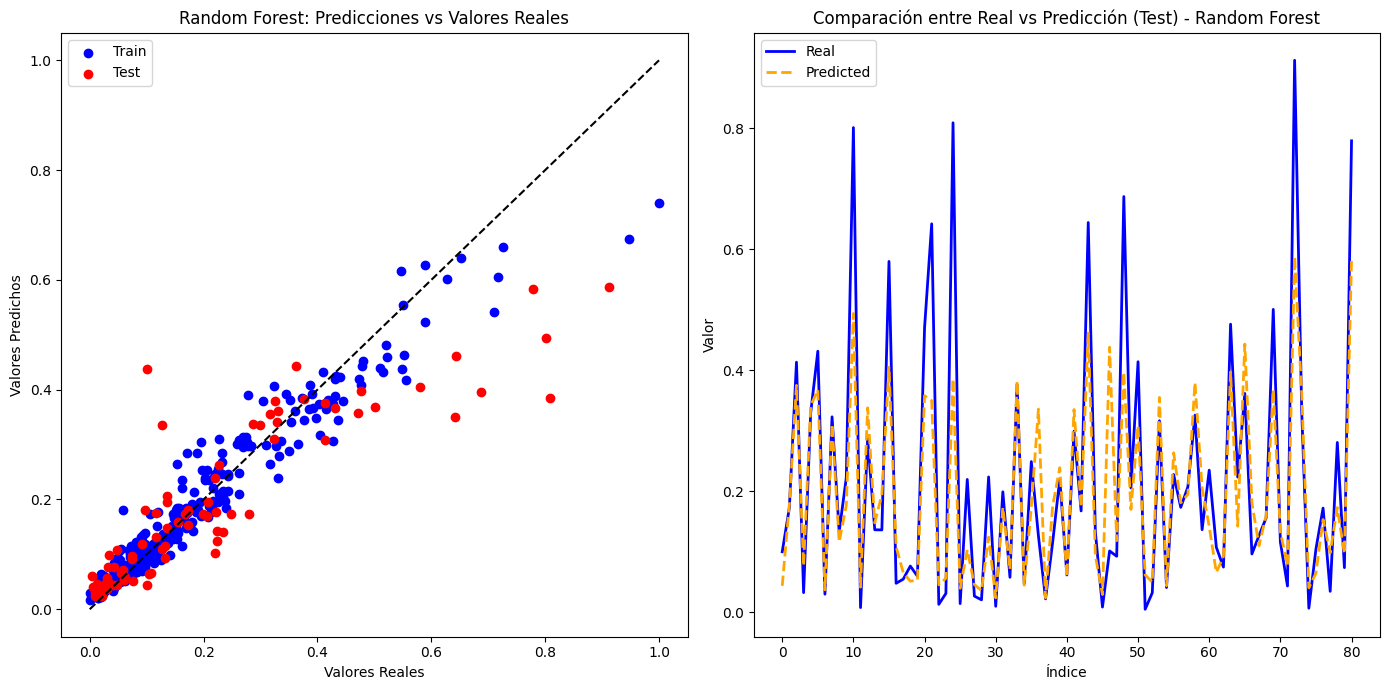

In [ ]:

plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_rf, color='blue', label='Train')
plt.scatter(y_test, y_test_pred_rf, color='red', label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Random Forest: Predicciones vs Valores Reales')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(y_test.values, label='Real', color='blue', linestyle='-', linewidth=2)
plt.plot(y_test_pred_rf, label='Predicted', color='orange', linestyle='--', linewidth=2)
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación entre Real vs Predicción (Test) - Random Forest')
plt.legend()

plt.tight_layout()
plt.show()


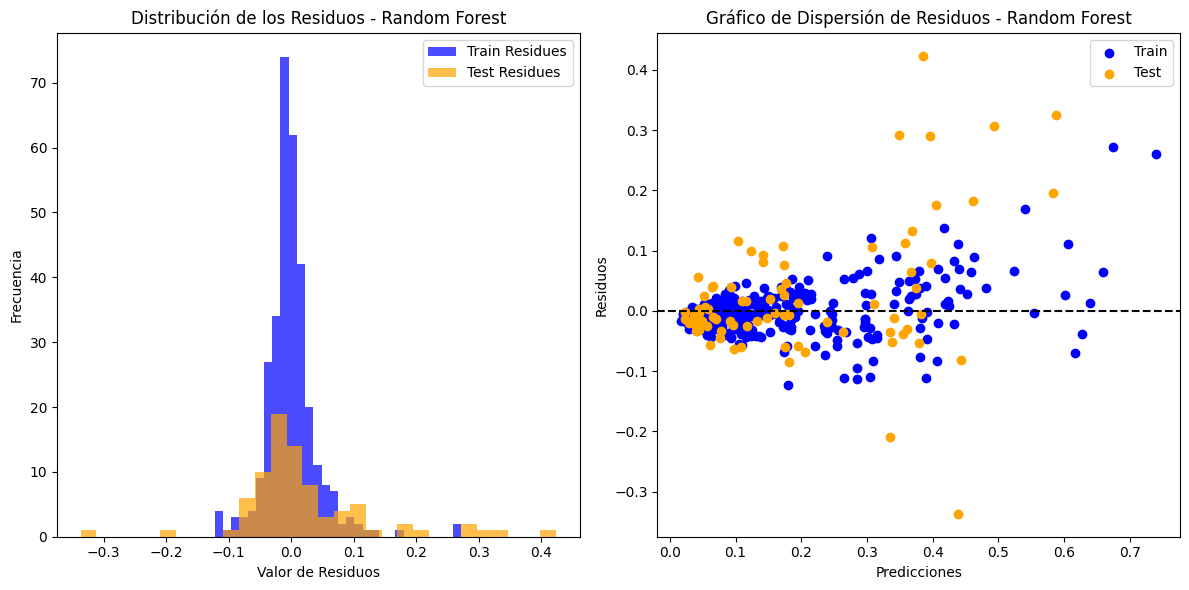

In [ ]:

residuos_train_rf = y_train - y_train_pred_rf
residuos_test_rf = y_test - y_test_pred_rf


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(residuos_train_rf, bins=30, color='blue', alpha=0.7, label='Train Residues')
plt.hist(residuos_test_rf, bins=30, color='orange', alpha=0.7, label='Test Residues')
plt.title('Distribución de los Residuos - Random Forest')
plt.xlabel('Valor de Residuos')
plt.ylabel('Frecuencia')
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(y_train_pred_rf, residuos_train_rf, color='blue', label='Train')
plt.scatter(y_test_pred_rf, residuos_test_rf, color='orange', label='Test')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Gráfico de Dispersión de Residuos - Random Forest')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.legend()

plt.tight_layout()
plt.show()


                       Característica  Importancia
5     Alcance de playlists en Spotify     0.496054
4  Conteo de las playlists en Spotify     0.270434
0                    Vistas en TikTok     0.137599
3             Publicaciones de TikTok     0.071330
1                Seguidores en TikTok     0.012430
2     Tasa de Participación en TikTok     0.012153


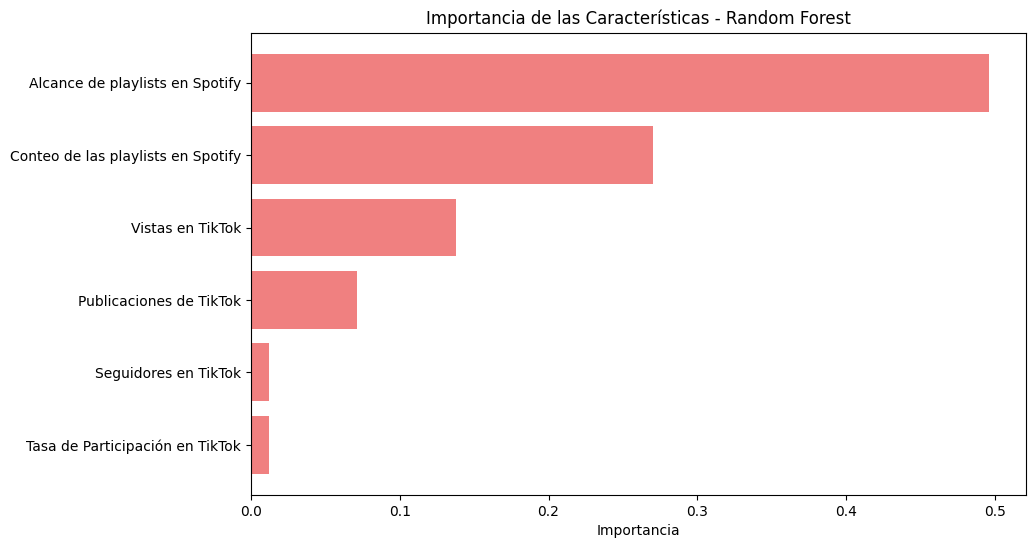

In [ ]:

importancia_rf = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': rf_model.feature_importances_
})


importancia_rf = importancia_rf.sort_values(by='Importancia', ascending=False)


print(importancia_rf)


plt.figure(figsize=(10, 6))
plt.barh(importancia_rf['Característica'], importancia_rf['Importancia'], color='lightcoral')
plt.xlabel('Importancia')
plt.title('Importancia de las Características - Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

gb_model = GradientBoostingRegressor( n_estimators=750,random_state=42,subsample=1,min_samples_split=12,min_samples_leaf=10,max_depth=2,learning_rate=0.0155)



gb_model.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=0.0155, max_depth=2,
                          min_samples_leaf=10, min_samples_split=12,
                          n_estimators=750, random_state=42, subsample=1)

In [ ]:

y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)


r2_train_gb = r2_score(y_train, y_train_pred_gb)
mae_train_gb = mean_absolute_error(y_train, y_train_pred_gb)
rmse_train_gb = np.sqrt(mean_squared_error(y_train, y_train_pred_gb))


r2_test_gb = r2_score(y_test, y_test_pred_gb)
mae_test_gb = mean_absolute_error(y_test, y_test_pred_gb)
rmse_test_gb = np.sqrt(mean_squared_error(y_test, y_test_pred_gb))


print(f"Entrenamiento - Gradient Boosting - R²: {r2_train_gb:.4f}, MAE: {mae_train_gb:.4f}, RMSE: {rmse_train_gb:.4f}")
print(f"Prueba - Gradient Boosting - R²: {r2_test_gb:.4f}, MAE: {mae_test_gb:.4f}, RMSE: {rmse_test_gb:.4f}")


Entrenamiento - Gradient Boosting - R²: 0.8789, MAE: 0.0375, RMSE: 0.0567
Prueba - Gradient Boosting - R²: 0.7820, MAE: 0.0635, RMSE: 0.0997


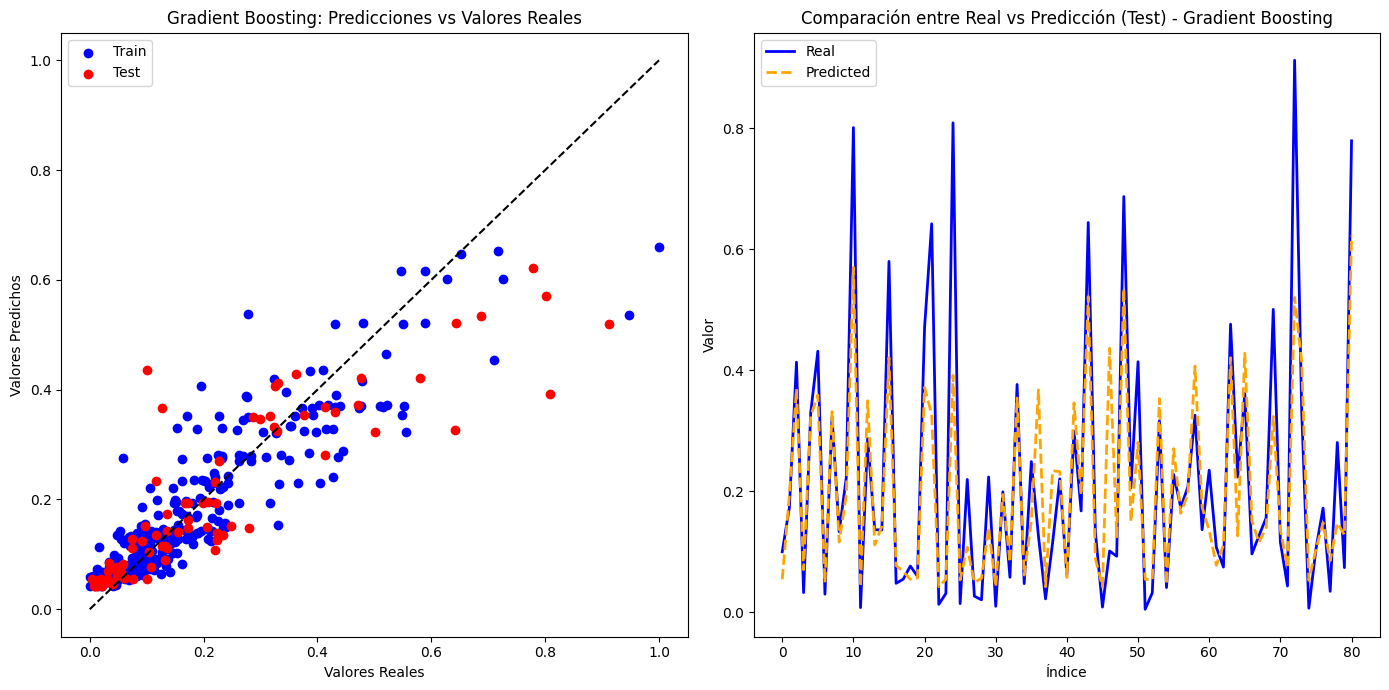

In [ ]:

y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)


residuos_train_gb = y_train - y_train_pred_gb
residuos_test_gb = y_test - y_test_pred_gb


plt.figure(figsize=(14, 7))


plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_gb, color='blue', label='Train')
plt.scatter(y_test, y_test_pred_gb, color='red', label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Gradient Boosting: Predicciones vs Valores Reales')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(y_test.values, label='Real', color='blue', linestyle='-', linewidth=2)
plt.plot(y_test_pred_gb, label='Predicted', color='orange', linestyle='--', linewidth=2)
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Comparación entre Real vs Predicción (Test) - Gradient Boosting')
plt.legend()

plt.tight_layout()
plt.show()



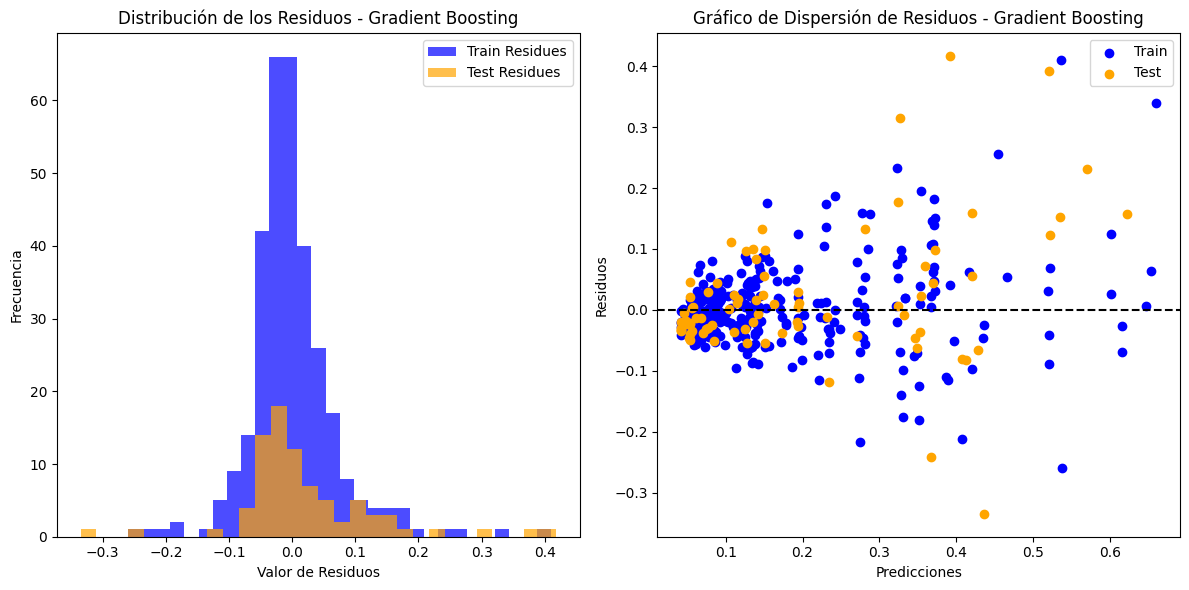

In [ ]:

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.hist(residuos_train_gb, bins=30, color='blue', alpha=0.7, label='Train Residues')
plt.hist(residuos_test_gb, bins=30, color='orange', alpha=0.7, label='Test Residues')
plt.title('Distribución de los Residuos - Gradient Boosting')
plt.xlabel('Valor de Residuos')
plt.ylabel('Frecuencia')
plt.legend()


plt.subplot(1, 2, 2)
plt.scatter(y_train_pred_gb, residuos_train_gb, color='blue', label='Train')
plt.scatter(y_test_pred_gb, residuos_test_gb, color='orange', label='Test')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Gráfico de Dispersión de Residuos - Gradient Boosting')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor


param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}


gb_model = GradientBoostingRegressor(random_state=42)


random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist,
                                   n_iter=100, cv=5, random_state=42, n_jobs=-1)


random_search.fit(X_train, y_train)


best_params = random_search.best_params_
print("Mejores hiperparámetros encontrados:", best_params)


best_gb_model = random_search.best_estimator_


y_train_pred_gb = best_gb_model.predict(X_train)
y_test_pred_gb = best_gb_model.predict(X_test)


r2_train_gb = r2_score(y_train, y_train_pred_gb)
mae_train_gb = mean_absolute_error(y_train, y_train_pred_gb)
rmse_train_gb = np.sqrt(mean_squared_error(y_train, y_train_pred_gb))


r2_test_gb = r2_score(y_test, y_test_pred_gb)
mae_test_gb = mean_absolute_error(y_test, y_test_pred_gb)
rmse_test_gb = np.sqrt(mean_squared_error(y_test, y_test_pred_gb))


print(f"Entrenamiento - Gradient Boosting - R²: {r2_train_gb:.4f}, MAE: {mae_train_gb:.4f}, RMSE: {rmse_train_gb:.4f}")
print(f"Prueba - Gradient Boosting - R²: {r2_test_gb:.4f}, MAE: {mae_test_gb:.4f}, RMSE: {rmse_test_gb:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
125 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
57 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

Mejores hiperparámetros encontrados: {'subsample': 0.9, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 5, 'learning_rate': 0.01}
Entrenamiento - Gradient Boosting - R²: 0.9760, MAE: 0.0190, RMSE: 0.0252
Prueba - Gradient Boosting - R²: 0.7734, MAE: 0.0648, RMSE: 0.1017
